最长音频文件: D32_980.wav, 时长: 16.31秒


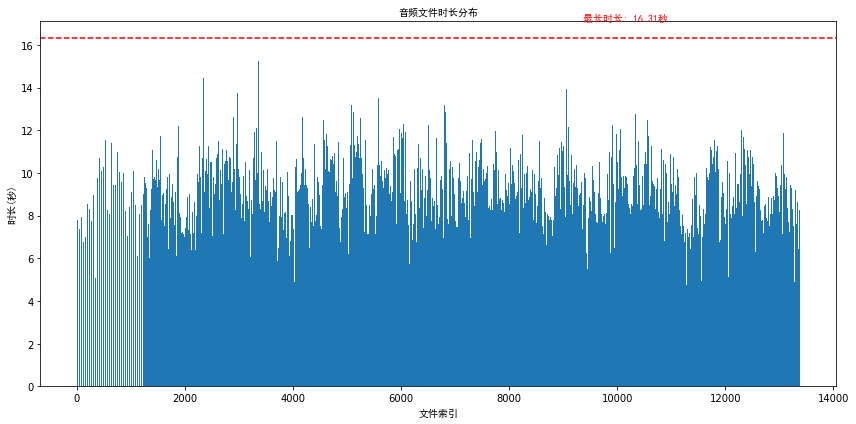

In [1]:
import os
import wave
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置中文字体
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows系统常见中文字体路径
font_prop = font_manager.FontProperties(fname=font_path)

# 获取所有wav文件路径
def get_wav_files(folder):
    wav_files = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith('.wav'):
                wav_files.append(os.path.join(root, file))
    return wav_files

# 计算wav文件时长
def get_wav_duration(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        frames = wav_file.getnframes()
        rate = wav_file.getframerate()
        duration = frames / float(rate)
        return duration

# 主函数
def main():
    folder = 'h:\\project\\sound\\data_thchs30\\data'  # 你的wav文件所在目录
    wav_files = get_wav_files(folder)
    
    # 计算所有文件时长
    durations = []
    for file in wav_files:
        duration = get_wav_duration(file)
        durations.append(duration)
    
    # 找出最长时长
    max_duration = max(durations)
    max_index = durations.index(max_duration)
    max_file = os.path.basename(wav_files[max_index])
    
    print(f'最长音频文件: {max_file}, 时长: {max_duration:.2f}秒')
    
    # 绘制柱状图
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(durations)), durations)
    plt.title('音频文件时长分布', fontproperties=font_prop)
    plt.xlabel('文件索引', fontproperties=font_prop)
    plt.ylabel('时长(秒)', fontproperties=font_prop)
    
    # 标注最长时长
    plt.axhline(y=max_duration, color='r', linestyle='--')
    plt.text(len(durations)*0.7, max_duration*1.05, 
             f'最长时长: {max_duration:.2f}秒', 
             fontproperties=font_prop, color='red')
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

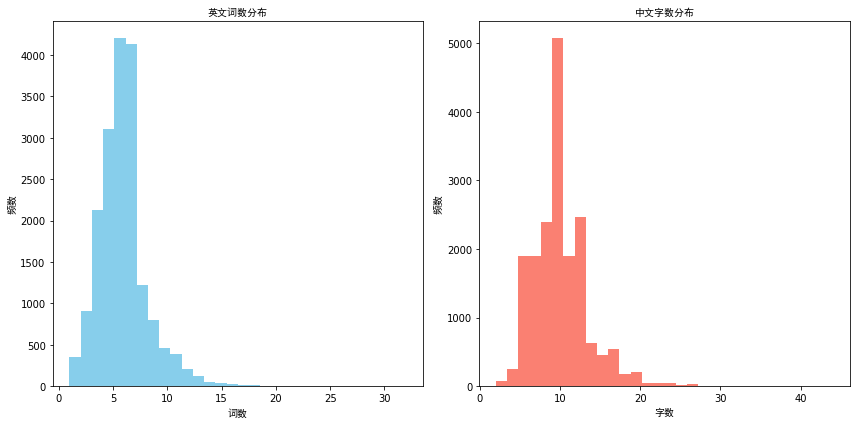

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置中文字体
font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = font_manager.FontProperties(fname=font_path)

# 读取文件并统计长度
def analyze_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    en_lengths = []
    cn_lengths = []
    
    for line in lines:
        en, cn = line.strip().split('\t')  # 假设数据是英文\t中文格式
        en_lengths.append(len(en.split()))
        cn_lengths.append(len(cn))
    
    return en_lengths, cn_lengths

# 绘制双柱状图
def plot_comparison(en_lengths, cn_lengths):
    plt.figure(figsize=(12, 6))
    
    # 英文词数分布
    plt.subplot(1, 2, 1)
    plt.hist(en_lengths, bins=30, color='skyblue')
    plt.title('英文词数分布', fontproperties=font_prop)
    plt.xlabel('词数', fontproperties=font_prop)
    plt.ylabel('频数', fontproperties=font_prop)
    
    # 中文字数分布
    plt.subplot(1, 2, 2)
    plt.hist(cn_lengths, bins=30, color='salmon')
    plt.title('中文字数分布', fontproperties=font_prop)
    plt.xlabel('字数', fontproperties=font_prop)
    plt.ylabel('频数', fontproperties=font_prop)
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    file_path = 'h:\\project\\sound\\data\\en-cn\\cmn.txt'  # 修改为你的文件路径
    en_lengths, cn_lengths = analyze_file(file_path)
    plot_comparison(en_lengths, cn_lengths)

In [3]:
!pip install zhconv

Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
     -------------------------------------- 211.6/211.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for zhconv: filename=zhconv-1.4.3-py2.py3-none-any.whl size=208868 sha256=25fd64d425822205f50e3f9bb28c716f52c2a85a8ac6b9188c5844593cf41066
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\62\eb\55\160a0c36f9d7a6df908092754d4ceef4531ef4f41d0002b0e0
Successfully built zhconv


In [4]:
import os
from zhconv import convert  # 需要安装：pip install zhconv

def process_file(input_path, output_path):
    """
    处理翻译数据集文件：
    1. 繁体中文转简体
    2. 检查并修复缺少分隔符的记录
    3. 生成新的处理后的文件
    """
    fixed_count = 0
    total_count = 0
    
    with open(input_path, 'r', encoding='utf-8') as infile, \
         open(output_path, 'w', encoding='utf-8') as outfile:
        
        for line in infile:
            total_count += 1
            line = line.strip()
            
            # 检查并修复缺少分隔符的记录
            if '\t' not in line and len(line) > 0:
                # 尝试自动修复（假设英文在前，中文在后）
                # 查找第一个中文字符的位置
                first_cn_char = next((i for i, c in enumerate(line) 
                                     if '\u4e00' <= c <= '\u9fff'), None)
                
                if first_cn_char is not None and first_cn_char > 0:
                    line = line[:first_cn_char] + '\t' + line[first_cn_char:]
                    fixed_count += 1
                else:
                    print(f"无法自动修复的行(将被跳过): {line}")
                    continue
            
            # 分割中英文
            parts = line.split('\t')
            if len(parts) != 2:
                print(f"格式错误(将被跳过): {line}")
                continue
            
            en, cn = parts
            
            # 繁体转简体
            cn_simplified = convert(cn, 'zh-cn')
            
            # 写入新文件
            outfile.write(f"{en}\t{cn_simplified}\n")
    
    print(f"处理完成！共处理 {total_count} 条记录")
    print(f"自动修复了 {fixed_count} 条缺少分隔符的记录")
    print(f"新文件已保存到: {os.path.abspath(output_path)}")

if __name__ == '__main__':
    input_file = 'h:\\project\\sound\\data\\en-cn\\cmn.txt'  # 原始文件路径
    output_file = 'h:\\project\\sound\\data\\en-cn\\cmn_processed.txt'  # 新文件路径
    
    process_file(input_file, output_file)

处理完成！共处理 18167 条记录
自动修复了 0 条缺少分隔符的记录
新文件已保存到: h:\project\sound\data\en-cn\cmn_processed.txt
